<!--NAVIGATION-->
< [密度和轮廓图](04.04-Density-and-Contour-Plots.ipynb) | [目录](Index.ipynb) | [自定义图表图例](04.06-Customizing-Legends.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.05-Histograms-and-Binnings.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Histograms, Binnings, and Density

# 直方图，分桶和密度

> A simple histogram can be a great first step in understanding a dataset.
Earlier, we saw a preview of Matplotlib's histogram function (see [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb)), which creates a basic histogram in one line, once the normal boiler-plate imports are done:

一个简单的直方图可以是我们开始理解数据集的第一步。前面我们看到了Matplotlib的直方图函数（参见[比较，遮盖和布尔逻辑](02.06-Boolean-Arrays-and-Masks.ipynb)），我们可以用一行代码绘制基础的直方图，当然首先需要将需要用的包导入notebook：

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

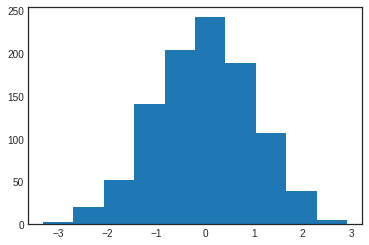

In [2]:
plt.hist(data);

> The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

`hist()`函数有很多的参数可以用来调整运算和展示；下面又一个更加个性化的直方图展示：

译者注：normed参数已经过时，此处对代码进行了相应修改，使用了替代的density参数。

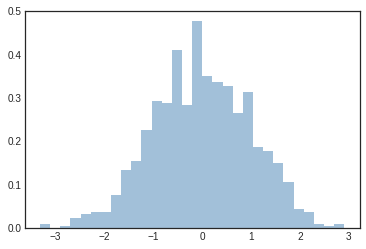

In [3]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

> The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

`plt.hist`文档中有更多关于个性化参数的信息。作者发现联合使用`histtype='stepfilled'`和`alpha`参数设置透明度在对不同分布的数据集进行比较展示时很有用：

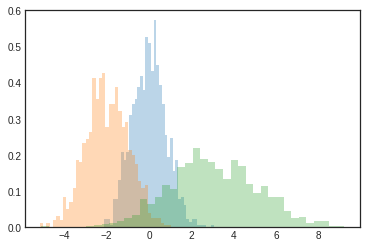

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

> If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

如果你只是需要计算直方图的数值（即每个桶的数据点数量）而不是展示图像，`np.histogram()`函数可以完成这个目标：

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 23 192 446 295  44]


## Two-Dimensional Histograms and Binnings

## 二维直方图和分桶

> Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an ``x`` and ``y`` array drawn from a multivariate Gaussian distribution:

正如前面我们可以在一维上使用数值对应的直线划分桶一样，我们也可以在二维上使用数据对应的点来划分桶。本节我们介绍几种实现的方法。首先定义数据集，从多元高斯分布中获得`x`和`y`数组：

In [6]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: Two-dimensional histogram

### `plt.hist2d`：二维直方图

> One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

绘制二维直方图最直接的方法是使用Matplotlib的`plt.hist2d`函数：

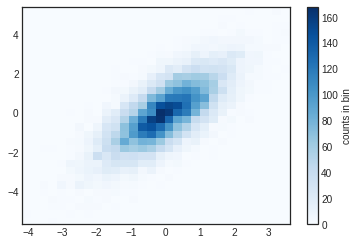

In [7]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

> Just as with ``plt.hist``, ``plt.hist2d`` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as ``plt.hist`` has a counterpart in ``np.histogram``, ``plt.hist2d`` has a counterpart in ``np.histogram2d``, which can be used as follows:

类似`plt.hist`，`plt.hist2d`有许多额外的参数来调整分桶计算和图表展示，可以通过文档了解更多信息。而且，`plt.hist`有`np.histogram`，`plt.hist2d`也有其对应的函数`np.histogram2d`。如下例：

In [8]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

> For the generalization of this histogram binning in dimensions higher than two, see the ``np.histogramdd`` function.

如果要获得更高维度的分桶结果，参见`np.histogramdd`函数文档。

### ``plt.hexbin``: Hexagonal binnings

### ``plt.hexbin`：六角形分桶

> The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

刚才的二维分桶是沿着坐标轴将每个桶分为正方形。另一个很自然的分桶形状就是正六边形。对于这个需求，Matplotlib提供了`plt.hexbin`函数，它也是在二维平面上分桶展示，不过每个桶（即图表上的每个数据格）将会是六边形：

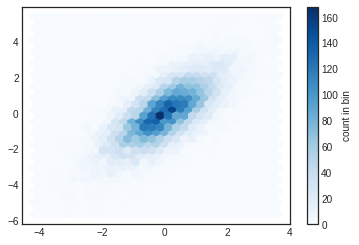

In [9]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

> ``plt.hexbin`` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).

`plt.hexbin`有许多有趣的参数，包括能对每个点设置权重和将每个桶的输出数据结果改为任意的NumPy聚合结果（带权重的平均值，带权重的标准差等）。

### Kernel density estimation

### 核密度估计

> Another common method of evaluating densities in multiple dimensions is *kernel density estimation* (KDE).
This will be discussed more fully in [In-Depth: Kernel Density Estimation](05.13-Kernel-Density-Estimation.ipynb), but for now we'll simply mention that KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function.
One extremely quick and simple KDE implementation exists in the ``scipy.stats`` package.
Here is a quick example of using the KDE on this data:

另外一个常用来统计多维数据密度的工具是*核密度估计*（KDE）。这部分内容将在[深入：核密度估计](05.13-Kernel-Density-Estimation.ipynb)一节中详细介绍。目前我们只需要知道KDE被认为是一种可以用来填补数据的空隙并补充上平滑变化数据的方法就足够了。快速和简单的KDE算法已经在`scipy.stats`模块中有了成熟的实现。下面我们就一个简单的例子来说明如何使用KDE和绘制相应的二维直方图：

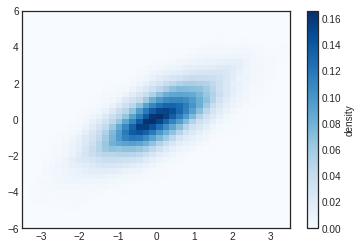

In [10]:
from scipy.stats import gaussian_kde

# 产生和处理数据，初始化KDE
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 在通用的网格中计算得到Z的值
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 将图表绘制成一张图像
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

> KDE has a smoothing length that effectively slides the knob between detail and smoothness (one example of the ubiquitous bias–variance trade-off).
The literature on choosing an appropriate smoothing length is vast: ``gaussian_kde`` uses a rule-of-thumb to attempt to find a nearly optimal smoothing length for the input data.

KDE有着光滑的长度，可以在细节和光滑度中有效的进行调节（一个例子是方差偏差权衡）。这方面有大量的文献介绍：高斯核密度估计`gaussian_kde`使用了经验法则来寻找输入数据附近的优化光滑长度值。

> Other KDE implementations are available within the SciPy ecosystem, each with its own strengths and weaknesses; see, for example, ``sklearn.neighbors.KernelDensity`` and ``statsmodels.nonparametric.kernel_density.KDEMultivariate``.
For visualizations based on KDE, using Matplotlib tends to be overly verbose.
The Seaborn library, discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb), provides a much more terse API for creating KDE-based visualizations.

其他的KDE实现也可以在SciPy中找到，每一种都有它的优点和缺点；参见``sklearn.neighbors.KernelDensity``和``statsmodels.nonparametric.kernel_density.KDEMultivariate``。要绘制基于KDE进行可视化的图表，Matplotlib写出的代码会比较冗长。我们将在[使用Seaborn进行可视化](04.14-Visualization-With-Seaborn.ipynb)一节中介绍Seaborn库，它提供了更加简洁的方式用来绘制KDE图表。

<!--NAVIGATION-->
< [密度和轮廓图](04.04-Density-and-Contour-Plots.ipynb) | [目录](Index.ipynb) | [自定义图表图例](04.06-Customizing-Legends.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.05-Histograms-and-Binnings.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
